In [2]:
import os
import keras
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from IPython.display import Image
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.applications import VGG16,ResNet50,InceptionV3
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
base_path='C:/Users/nivik/Downloads/plant-seedlings-classification'
train_file_path=os.path.join(base_path,'train/')
test_file_path=os.path.join(base_path,'test/')

In [17]:
#testing data and scaling it
images=[]
for image in os.listdir(test_file_path):
    img=Image.open(os.path.join(test_file_path,image)).resize((224,224))
    images.append(np.asarray(img)/255.0)

test_images=np.array(images)

In [4]:
#Classes
classes=os.listdir(train_file_path)

In [18]:
test_images.shape

(794, 224, 224, 3)

In [60]:
def prediction_test(images,model,base_model):
    base_model_req = base_model(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model_req.layers:
        layer.trainable=False

    bottleneck_features= base_model_req.predict(images)
    y_pred=model.predict(bottleneck_features)

    label=[]

    fig=plt.figure(figsize=(15,15))
    for i in range(25):
        fig.add_subplot(5,5,i+1)
        class_name=classes[np.argmax(y_pred[i])]
        label.append(class_name)
        plt.imshow(test_images[i],cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.xlabel(class_name,color='white')
    fig.suptitle("Plant Seedling Recognition",color='white')
    
    return [np.argmax(y_pred[i]) for i in range(len(y_pred))]

Model Testing

a. Model generated from **"Transfer learning from VGG16"**

In [12]:
model_v=tf.keras.models.load_model("C:/Users/nivik/Downloads/plant-seedlings-classification/model_vgg_d.keras")

25/25 [==============================] - 0s 4ms/step


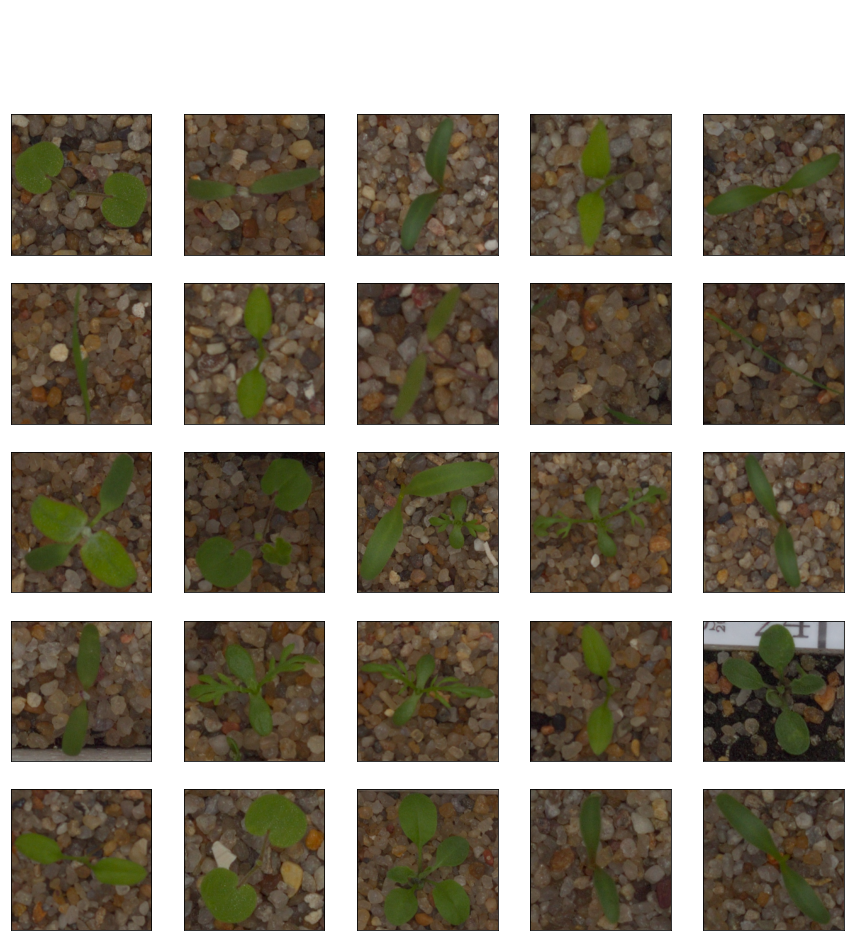

In [61]:
label_v=prediction_test(test_images,model_v,VGG16)

a. Model generated from **"Transfer learning from ResNet50"**

In [27]:
model_r=tf.keras.models.load_model("C:/Users/nivik/Downloads/plant-seedlings-classification/model_res_d.keras")

25/25 [==============================] - 0s 5ms/step


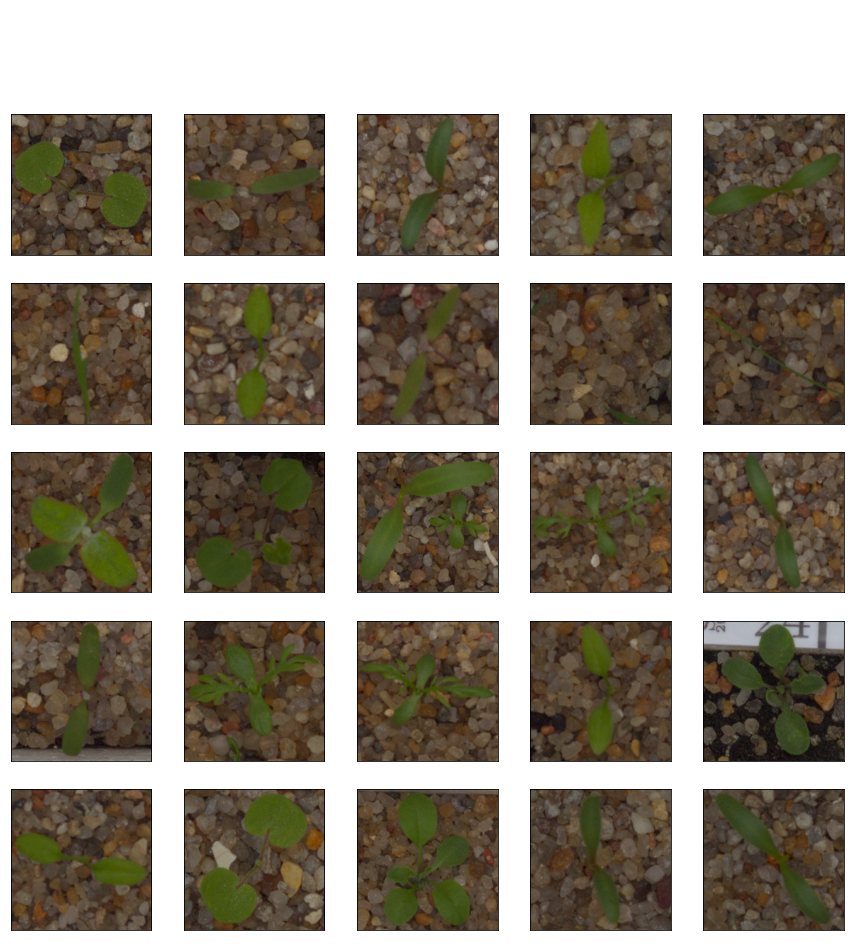

In [62]:
label_r=prediction_test(test_images,model_r,ResNet50)

a. Model generated from **"Transfer learning from InceptionV3"**

In [29]:
model_i=tf.keras.models.load_model("C:/Users/nivik/Downloads/plant-seedlings-classification/model_incep_d.keras")

25/25 [==============================] - 0s 5ms/step


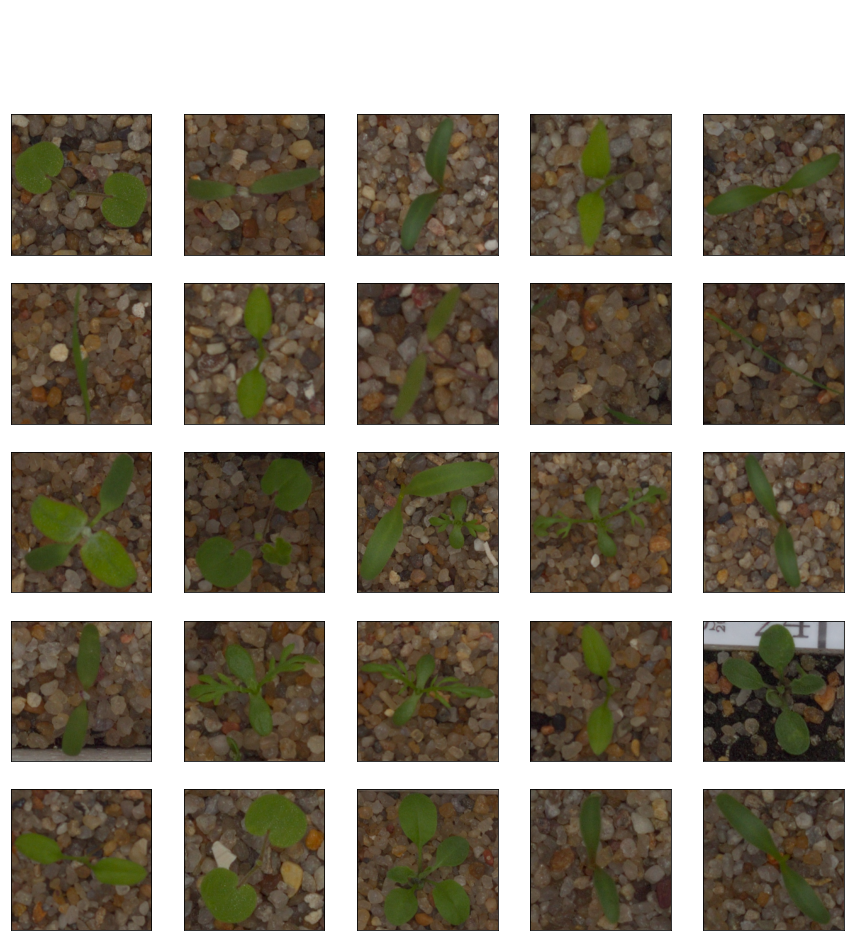

In [63]:
label_i=prediction_test(test_images,model_i,InceptionV3)

The following prediction labels are obtained by considering majority rule where the predictions of all the models are compared and majority label is taken.

Text(0.5, 0.98, 'Plant Seedling Recognition from Majority')

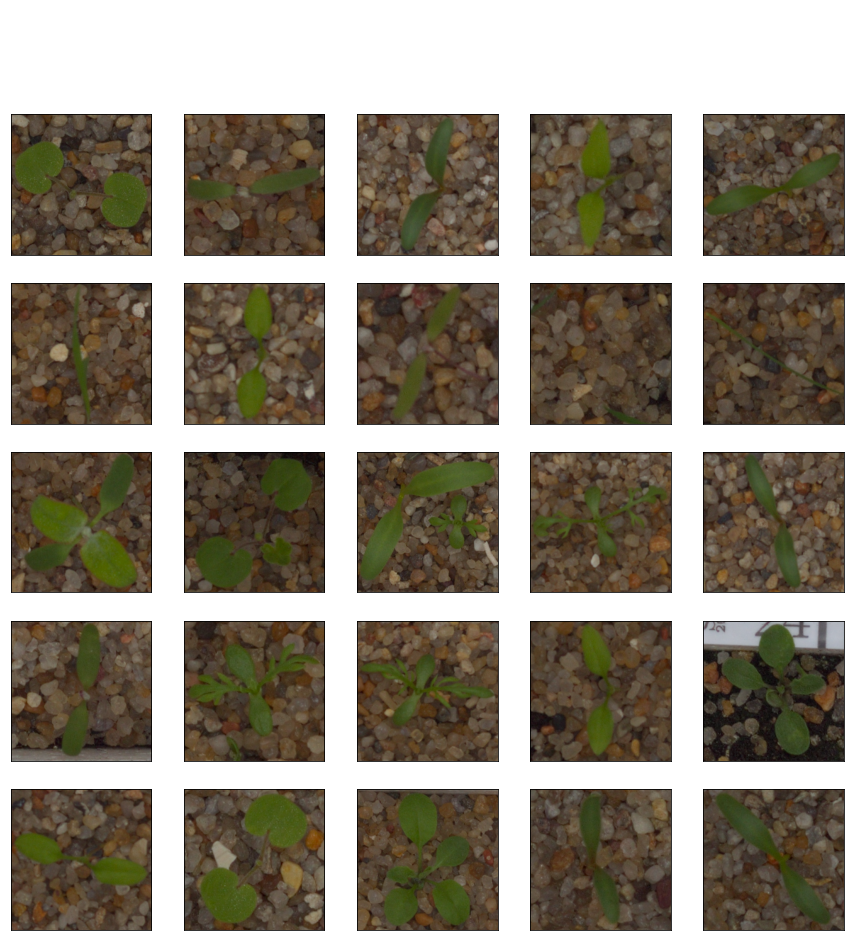

In [74]:
fig=plt.figure(figsize=(15,15))
for i in range(25):
    class_v=classes[label_v[i]]
    class_r=classes[label_r[i]]
    class_i=classes[label_i[i]]
    fig.add_subplot(5,5,i+1)
    j=0
    if class_v==class_r:
        j+=1
    if class_r==class_i:
        j+=2
    if class_v==class_i:
        j+=3
    if j==0 or j==2 or j==3 or j==6:
        plt.imshow(test_images[i],cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.xlabel(class_i,color='white')

    else:
        
        plt.imshow(test_images[i],cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.xlabel(class_r,color='white')

    
fig.suptitle("Plant Seedling Recognition from Majority",color='white')
        
